In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('dns.txt', names=['time', 'src', 'dest'])

In [8]:
df = df[df.time < 3600]

In [30]:
G = nx.from_pandas_dataframe(df, 'src', 'dest', create_using=nx.DiGraph())

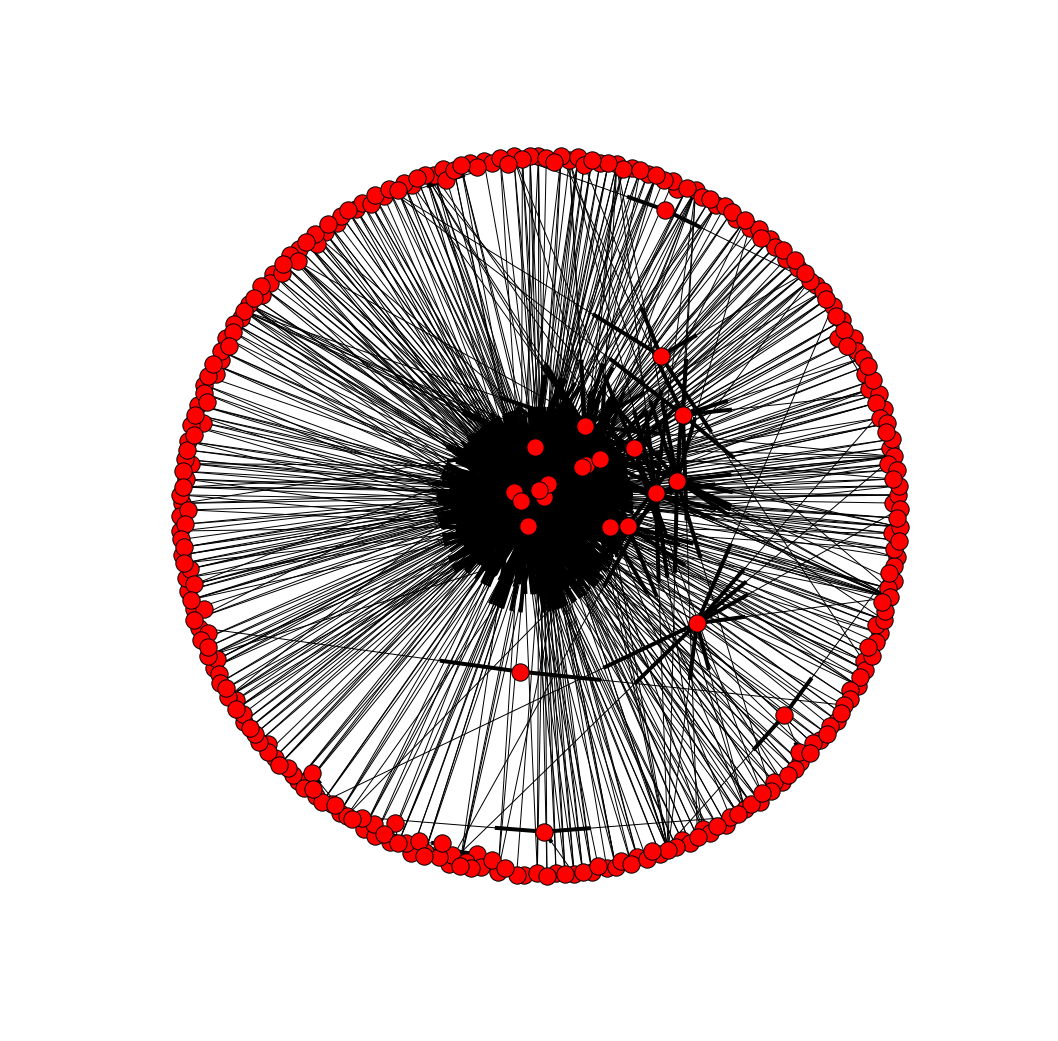

In [79]:
plt.figure(figsize=(14,14))

nx.draw(G)

In [32]:
N, K = G.order(), G.size()
avg_deg = float(K) / N

print "Nodes: ", N
print "Edges: ", K
print "Average degree: ", avg_deg
print "SCC: ", nx.number_strongly_connected_components(G)
print "WCC: ", nx.number_weakly_connected_components(G)

Nodes:  315
Edges:  713
Average degree:  2.26349206349
SCC:  315
WCC:  7


(1.0, 200)

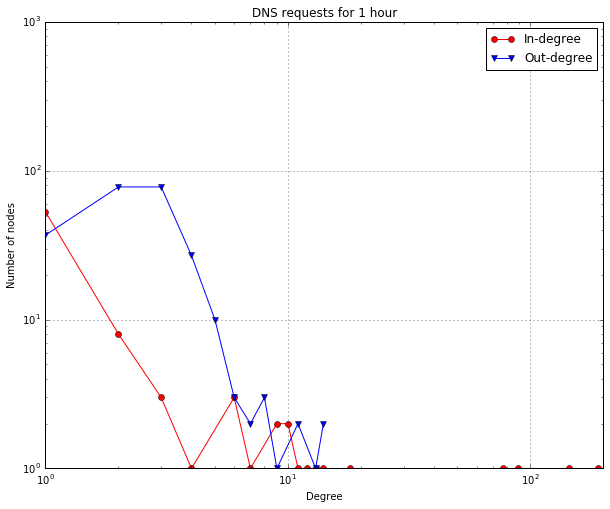

In [47]:
in_degrees = G.in_degree() # dictionary node:degree
in_values = sorted(set(in_degrees.values()))
in_hist = [in_degrees.values().count(x) for x in in_values]

out_degrees = G.out_degree() # dictionary node:degree
out_values = sorted(set(out_degrees.values()))
out_hist = [out_degrees.values().count(x) for x in out_values]

plt.figure(figsize=(10,8))
plt.grid(True)
plt.loglog(in_values, in_hist, 'ro-') # in-degree
plt.loglog(out_values, out_hist, 'bv-') # out-degree
plt.legend(['In-degree', 'Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('DNS requests for 1 hour')
plt.xlim([0, 2*10**2])
#plt.savefig('./output/cam_net_degree_distribution.pdf')
#plt.close()

In [41]:
print in_hist
print out_hist

[233, 53, 8, 3, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[71, 37, 78, 78, 27, 10, 3, 2, 3, 1, 2, 1, 2]


In [46]:
sorted(in_degrees.values(), reverse=True)[:20]

[190, 144, 89, 77, 18, 14, 13, 12, 11, 10, 10, 9, 9, 7, 6, 6, 6, 4, 3, 3]

In [48]:
sorted(out_degrees.values(), reverse=True)[:20]

[14, 14, 13, 11, 11, 9, 8, 8, 8, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5]

In [62]:
G_ud = G.to_undirected()

# Clustering coefficient of all nodes (in a dictionary)
clust_coefficients = nx.clustering(G_ud)

# Average clustering coefficient
avg_clust = sum(clust_coefficients.values()) / len(clust_coefficients)
print avg_clust

# Or use directly the built-in method
print nx.average_clustering(G_ud)

0.00792445035717
0.00792445035717


In [67]:
# Connected components are sorted in descending order of their size
G_components = list(nx.connected_component_subgraphs(G_ud))

G_mc = max(nx.connected_component_subgraphs(G_ud), key=len)
# Betweenness centrality
bet_cen = nx.betweenness_centrality(G_mc)
#print bet_cen

# Closeness centrality
clo_cen = nx.closeness_centrality(G_mc)
#print clo_cen

# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(G_mc, max_iter=10000)
#print eig_cen

In [68]:
def get_top_keys(dictionary, top):
    items = dictionary.items()
    items.sort(reverse=True, key=lambda x: x[1])
    return map(lambda x: x[0], items[:top])

top_bet_cen = get_top_keys(bet_cen,10)
top_clo_cen = get_top_keys(clo_cen,10)
top_eig_cent = get_top_keys(eig_cen,10)

In [69]:
print top_bet_cen
print top_clo_cen
print top_eig_cent

['C706', 'C5030', 'C1685', 'C1707', 'C2303', 'C3380', 'C608', 'C25022', 'C586', 'C1191']
['C706', 'C5030', 'C5778', 'C2303', 'C5913', 'C5919', 'C2021', 'C1191', 'C608', 'C814']
['C706', 'C5030', 'C1685', 'C1707', 'C5323', 'C4988', 'C2303', 'C2021', 'C4616', 'C94']


In [75]:
reader = pd.read_csv('flows.txt', names=['time', 'duration','src', 'src_port', 'dest', 
                                         'dest_port', 'protocol', 'packet_count', 'byte_count'], chunksize=102170)
for chunk in reader:
    df2 = chunk
    break

In [76]:
df2.describe()

,time,duration,protocol,packet_count,byte_count
count,102170.000000,102170.000000,102170.000000,102170.000000,1.021700e+05
mean,1900.130811,8.924283,6.985416,201.122717,1.934504e+05
std,1060.202688,17.130455,3.834650,2668.913080,3.445843e+06
min,1.000000,0.000000,1.000000,1.000000,4.600000e+01
25%,949.000000,0.000000,6.000000,1.000000,7.600000e+01
50%,1975.000000,0.000000,6.000000,4.000000,3.760000e+02
75%,2831.000000,10.000000,6.000000,7.000000,1.667000e+03
max,3599.000000,72.000000,17.000000,157353.000000,2.360157e+08


In [78]:
G2 = nx.from_pandas_dataframe(df2, 'src', 'dest', create_using=nx.DiGraph())

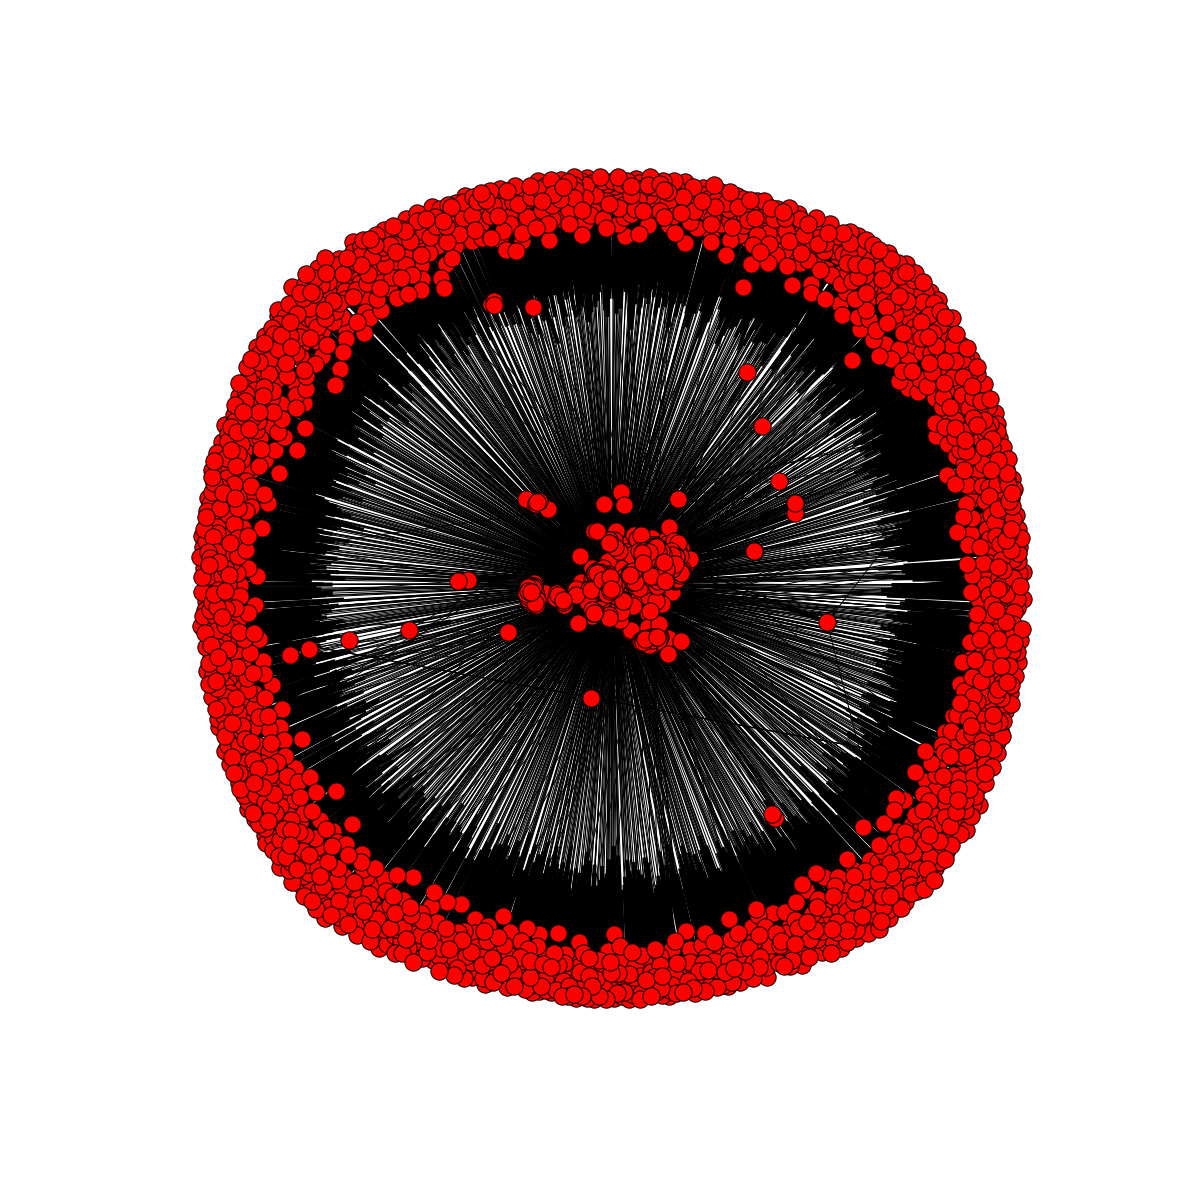

In [80]:
plt.figure(figsize=(16,16))

nx.draw(G2)